# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Abdulkadir Parlak
# Student ID: 2210765025

In [2]:
# imports
import _sqlite3
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqlite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single solution here, come up with your own design.

\<**your design here**\>

NOTE: After solving the questions, I realized that some of my tables aren't used but, I had created them already.(e.i. Flights,
 Partnerships) (in edit mode the lines of tables are aligned)

TABLES:

Clients:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| client_id     | INTEGER, PRIMARY KEY                       |
| full_name     | TEXT                                       |
| phone_number  | TEXT                                       |
| email         | TEXT                                       |


Partnerships:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| airline_id    | INTEGER, PRIMARY KEY                       |
| airline_name  | TEXT                                       |


Flights:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| flight_id     | INTEGER, PRIMARY KEY                       |
| airline_id    | INTEGER, FK REFERENCES Partnerships(airline_id)|
| departure_city| TEXT                                       |
| destination   | TEXT                                       |
| flight_date   | TEXT                                       |


Hotels:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| hotel_id      | INTEGER, PRIMARY KEY                       |
| hotel_name    | TEXT                                       |
| location      | TEXT                                       |
|feedback_rating| REAL                                       |


AirlineFeedbacks: (there are multiple columns combined as a primary key)
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| airline_id    | INTEGER, PRIMARY KEY, FK REFERENCES Partnerships(airline_id)|
| client_id     | INTEGER, PRIMARY KEY, FK REFERENCES Clients(client_id)|
| feedback_text | TEXT                                       |


HotelFeedbacks:  (there are multiple columns combined as a primary key)
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| hotel_id      | INTEGER, PRIMARY KEY, FK REFERENCES Hotels(hotel_id)|
| client_id     | INTEGER, PRIMARY KEY, FK REFERENCES Clients(client_id)|
| feedback_text | TEXT                                       |


HotelBookings:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| booking_id    | INTEGER, PRIMARY KEY                       |
| hotel_id      | INTEGER, FK REFERENCES Hotels(hotel_id)    |
| client_id     | INTEGER, FK REFERENCES Clients(client_id)  |


FlightBookings:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| booking_id    | INTEGER, PRIMARY KEY                       |
| flight_id     | INTEGER, FK REFERENCES Flights(flight_id)  |
| client_id     | INTEGER, FK REFERENCES Clients(client_id)  |



In [2]:
# connection to database
conn = _sqlite3.connect("skyward.db")
cursor = conn.cursor()

# dataset paths
datasetPath1 = "Data/BookingDetails.csv"
datasetPath2 = "Data/FeedbackDetails.csv"

In [3]:
 # Create the "Clients" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Clients(
    client_id INTEGER PRIMARY KEY,
    full_name TEXT,
    phone_number TEXT,
    email TEXT
    )
''')

In [4]:
 # Create the "Partnerships" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Partnerships(
    airline_id INTEGER PRIMARY KEY,
    airline_name TEXT
    )
''')

In [5]:
 # Create the "Flights" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Flights(
    flight_id INTEGER PRIMARY KEY,
    airline_id INTEGER,
    departure_city TEXT,
    destination TEXT,
    flight_date TEXT,
    FOREIGN KEY (airline_id) REFERENCES Partnerships(airline_id)
    )
''')

In [6]:
 # Create the "Hotels" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Hotels(
    hotel_id INTEGER PRIMARY KEY,
    hotel_name TEXT,
    location TEXT,
    feedback_rating TEXT
    )
''')

In [7]:
 # Create the "AirlineFeedbacks" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS AirlineFeedbacks(
    client_id INTEGER,
    airline_id INTEGER,
    feedback_text TEXT,
    PRIMARY KEY (airline_id, client_id),
    FOREIGN KEY (client_id) REFERENCES Clients(client_id),
    FOREIGN KEY (airline_id) REFERENCES Partnerships(airline_id)
    )
''')

In [8]:
 # Create the "HotelFeedbacks" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS HotelFeedbacks(
    hotel_id INTEGER,
    client_id INTEGER,
    feedback_text TEXT,
    PRIMARY KEY (hotel_id, client_id)
    FOREIGN KEY (hotel_id) REFERENCES Hotels(hotel_id),
    FOREIGN KEY (client_id) REFERENCES Clients(client_id)
    )
''')

In [9]:
 # Create the "HotelBookings" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS HotelBookings(
    booking_id INTEGER PRIMARY KEY,
    hotel_id INTEGER,
    client_id INTEGER,
    FOREIGN KEY (hotel_id) REFERENCES Hotels(hotel_id),
    FOREIGN KEY (client_id) REFERENCES Clients(client_id)
    )
''')

In [10]:
 # Create the "FlightBookings" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS FlightBookings(
    booking_id INTEGER PRIMARY KEY,
    flight_id INTEGER,
    airline_id INTEGER,
    client_id INTEGER,
    FOREIGN KEY (flight_id) REFERENCES Flights(flight_id),
    FOREIGN KEY (client_id) REFERENCES Clients(client_id)
    )
''')

In [11]:
conn.commit()

In [12]:
 # A helper function to display the schema of a table
def display_table_info(cursor, table_name, row_count):
    
    cursor.execute(f'''PRAGMA table_info({table_name})''')
    rows = cursor.fetchall()
    
    if row_count > len(rows):
        print("Error: row_count is greater than the number of rows in the result.")
    else:
        for i in range(row_count):
            print(rows[i])

In [13]:
conn = _sqlite3.connect("skyward.db")
cursor = conn.cursor()

 # inserting Clients, Partnerships(airlines), Flights, Hotels
try:
    with open(datasetPath1, "r") as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader) # it will not read the header line
        for row in csv_reader:
            cursor.execute("INSERT OR IGNORE INTO Clients (client_id, full_name, phone_number, email)"
                           " VALUES (?, ?, ?, ?)", (row[1], row[2], row[4], row[3]))
            
            # here I check if flight_id is null or not(if it is not null, it means that record is about flights (flight booking)) 
            if row[5] != '':
                airline_id = int(float(row[15]))
                cursor.execute("INSERT OR IGNORE INTO FlightBookings (booking_id, flight_id, airline_id, client_id)"
                               " VALUES (?, ?, ?, ?)", (row[0], row[5], airline_id, row[1]))
                cursor.execute("INSERT OR IGNORE INTO Partnerships (airline_id, airline_name)"
                               " VALUES (?, ?)", (airline_id, row[10]))
                cursor.execute("INSERT OR IGNORE INTO Flights (flight_id, airline_id, departure_city, destination, flight_date)"
                               " VALUES (?, ?, ?, ?, ?)", (row[5], airline_id, row[6], row[7], row[8]))
                
            # here I check if flight_id is null or not(if it is null, it means that record is about hotels (hotel booking))
            else:
                feedback_rating = int(float(row[14]))
                cursor.execute("INSERT OR IGNORE INTO HotelBookings (booking_id, hotel_id, client_id)"
                               " VALUES (?, ?, ?)", (row[0], row[11], row[1]))
                cursor.execute("INSERT OR IGNORE INTO Hotels (hotel_id, hotel_name, location, feedback_rating)"
                               " VALUES (?, ?, ?, ?)", (row[11], row[12], row[13], feedback_rating))
    conn.commit()
except Exception as e:
    print("Error:", e)
finally:
    conn.close()

In [14]:
conn = _sqlite3.connect("skyward.db")
cursor = conn.cursor()

 # inserting AirlineFeedbacks, HotelFeedbacks
try:
    with open(datasetPath2, "r") as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader) # it will not read the header line
        for row in csv_reader:
            
            # here I check if airline_id is null or not(if it is not null, it means that record is about airline (airline feedback)) 
            if row[2] != '' :
                airline_id = int(float(row[2]))
                cursor.execute("INSERT OR IGNORE INTO AirlineFeedbacks (client_id, airline_id, feedback_text)"
                               "VALUES (?, ?, ?)", (row[1], airline_id, row[4]))
                
            # here I check if airline_id is null or not(if it is null, it means that record is about hotels (hotel feedback))
            else:
                hotel_id = int(float(row[3]))
                cursor.execute("INSERT OR IGNORE INTO HotelFeedbacks (client_id, hotel_id, feedback_text)"
                               " VALUES (?, ?, ?)", (row[1], hotel_id, row[4]))
    conn.commit()
except Exception as e:
    print("Error:", e)
finally:
    conn.close()

In [15]:
# a code block to drop tables that are not wanted
'''conn = _sqlite3.connect("skyward.db")
cursor = conn.cursor()
tables_to_drop = ['FlightBookings']

# Drop each table
for table in tables_to_drop:
    cursor.execute(f"DROP TABLE IF EXISTS {table}")
'''

'conn = _sqlite3.connect("skyward.db")\ncursor = conn.cursor()\ntables_to_drop = [\'FlightBookings\']\n\n# Drop each table\nfor table in tables_to_drop:\n    cursor.execute(f"DROP TABLE IF EXISTS {table}")\n'

## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [3]:
conn = _sqlite3.connect("skyward.db")
cursor = conn.cursor()

In [17]:
# number of bookings for each hotel
df = pd.read_sql_query('''
SELECT hotel_name, COUNT(hb.booking_id) AS total_booking
FROM HotelBookings hb, Hotels h
WHERE hb.hotel_id = h.hotel_id
GROUP BY h.hotel_id -- since we are looking for each hotel, we should group hotels first
''', conn)
df

,hotel_name,total_booking
0,Opal Motel,11
1,Diamond Plaza,6
2,Golden Suites,16
3,Silver Villa,10
4,Emerald Motel,15
5,Sapphire Villa,14
6,Jade Motel,5
7,Jade Suites,7
8,Pearl Resort,12
9,Emerald Resort,9


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [18]:
# your code here
df = pd.read_sql_query('''
SELECT DISTINCT c.full_name AS client_name, c.phone_number, c.email
FROM Clients c, AirlineFeedbacks af, HotelFeedbacks hf
WHERE c.client_id = af.client_id AND c.client_id = hf.client_id
''', conn) # the people we are looking for should exist in both AirlineFeedbacks and HotelFeedbacks table
df

,client_name,phone_number,email
0,John Smith,555-3616974,john.smith@mail.com
1,Mia Smith,555-2197055,mia.smith@mail.com
2,Logan Garcia,555-8723852,logan.garcia@mail.com
3,Liam Davis,555-2949165,liam.davis@mail.com
4,John Brown,555-5988133,john.brown@mail.com
...,...,...,...
104,Mason Brown,555-5765623,mason.brown@mail.com
105,Olivia Williams,555-0780377,olivia.williams@mail.com
106,Logan Brown,555-6902160,logan.brown@mail.com
107,Liam Davis,555-8686220,liam.davis@mail.com


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [5]:
# your code here
df = pd.read_sql_query('''
SELECT hotel_name, feedback_rating
FROM Hotels
WHERE feedback_rating > (SELECT AVG(feedback_rating)
                         FROM Hotels) -- in this inner query, average feedback rating of all hotels are found
                                     -- and later used in outer query
''', conn)
df

,hotel_name,feedback_rating
0,Golden Suites,5
1,Silver Villa,5
2,Emerald Motel,4
3,Jade Suites,5
4,Silver Resort,4
5,Diamond Villa,4
6,Sapphire Villa,5
7,Diamond Resort,5
8,Golden Retreat,5
9,Ruby Hideaway,4


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [20]:
# your code here
df = pd.read_sql_query('''
SELECT c.full_name, COUNT(DISTINCT fb.airline_id) AS total_distinct_airline_bookings,
    COUNT(DISTINCT hb.hotel_id) AS total_distinct_hotel_bookings
FROM Clients c
JOIN FlightBookings fb ON c.client_id = fb.client_id --joined the tables
JOIN HotelBookings hb ON c.client_id = hb.client_id
GROUP BY c.client_id
HAVING COUNT(DISTINCT airline_id) >= 2 AND -- different airlines (so distinct keyword used in order not to get duplicates)
       COUNT(DISTINCT hotel_id) >= 3    -- same as above
''', conn) # couldn't find any people to satisfies the condition
df

,full_name,total_distinct_airline_bookings,total_distinct_hotel_bookings
0,person,2,3


## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [21]:
# your code here
# :)

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [22]:
# your code here
df = pd.read_csv("Data/titanic.csv")

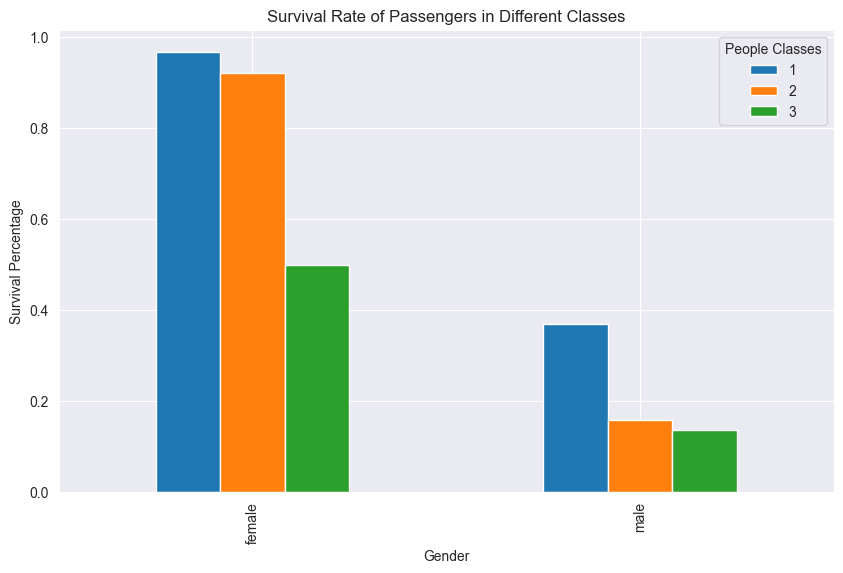

In [23]:
# create a pivot table using survival rate of the people in the Titanic, categorized by gender and class.
pivot_table = pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
pivot_table.plot(kind='bar', figsize=(10, 6))

# set the labels of the graph
plt.title('Survival Rate of Passengers in Different Classes')
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.legend(title='People Classes')
plt.show()

# **Comments:**
# As you can see in the pivot table, female people of the class of 1 are survived the most.
# On the other hand, male people of the class of 3 are survived at least.
# Maybe the bias in the survival rate of the people of different classes give information
# about the behavior of the Titanic crew while evacuation process.

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


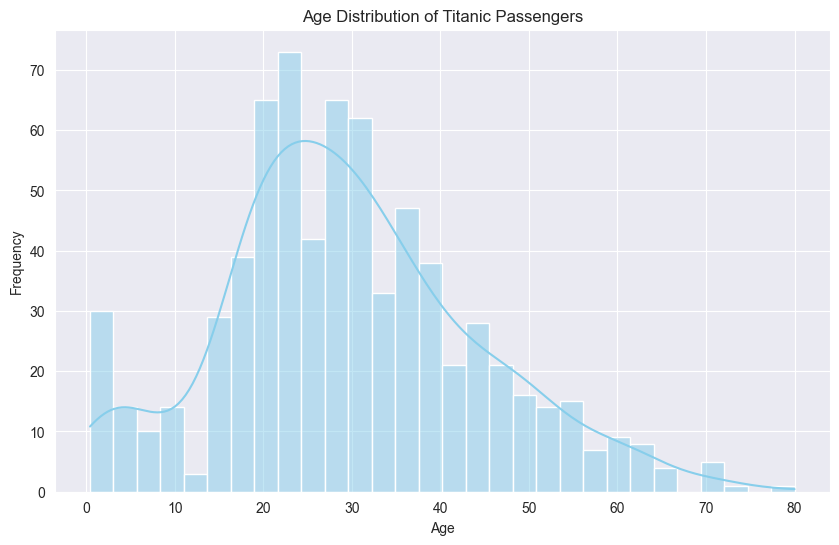

In [24]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create a histogram with KDE overlay
sns.histplot(data=df, x='Age', kde=True, bins=30, ax=ax, color='skyblue')

# set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Titanic Passengers')
plt.show()


# **Comments:**
# As can be seen in the graph, the age distribution in Titanic was grouped around 20 and 40 mostly.
# The average age can be supposed as young.
# Also, there were more children than the older(I assume that older is 65+).

    ## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

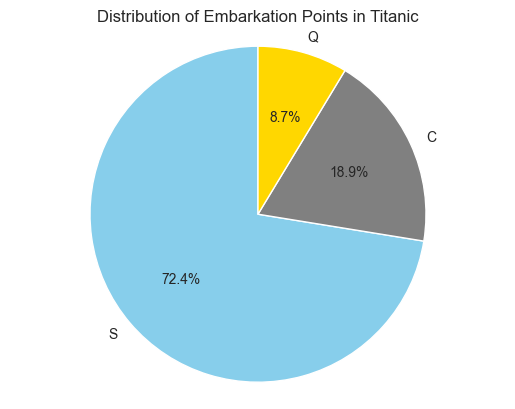

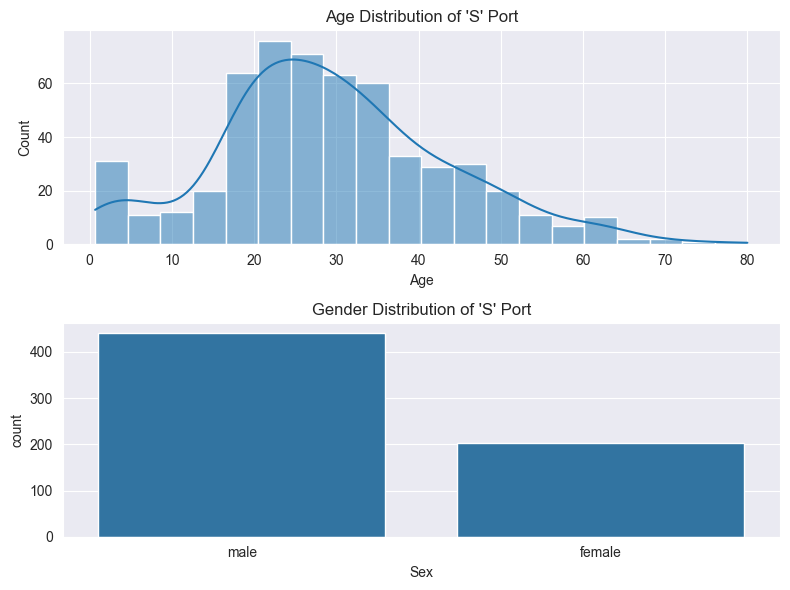

In [25]:
# Drop rows with null values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])

# find the distinct values in the 'Embarked' column as labels
labels = df['Embarked'].unique().tolist()

# Count the occurrences of each category in the 'Embarked' column
embarkation_counts = df['Embarked'].value_counts()

# Create a pie chart
plt.pie(embarkation_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['skyblue', 'gray', 'gold'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set the title
plt.title('Distribution of Embarkation Points in Titanic')

# Show the plot
plt.show()

# Comments:
# The port with the highest boarding is S.

# Analyze the age and sex distribution from the 'S' port
S_df = df[df['Embarked'] == 'S']

# Plotting some graph to visualize the data
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
# histogram used for visualization because the age distribution is numerical
sns.histplot(S_df['Age'], kde=True)
plt.title("Age Distribution of 'S' Port")

plt.subplot(2, 1, 2)
# count plot is used for this because gender is a categorical value
sns.countplot(x='Sex', data=S_df)
plt.title("Gender Distribution of 'S' Port")

plt.tight_layout()
plt.show()


# **Comments:**
# Since the most of the passengers board from the S port, the age distribution of S port has quite similar pattern
# to the overall data.
# As seen in the graph; in the S port, there is not a 'women and children first' evacuation policy in question at all.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

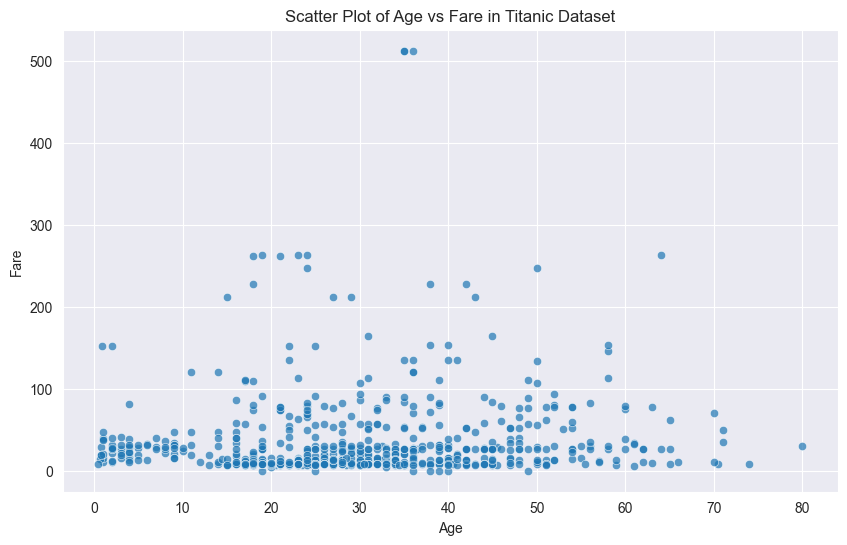

In [26]:
# create a scatter plot comparing age and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.70)

# set the title and axes labels
plt.title('Scatter Plot of Age vs Fare in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


# **Comments:**
# Most of the fares are grouped around 0-100, but there are also some fares over 500+.
# They may belong to royal suites of Titanic.

# I couldn't see anything like no-fare-for-children kind of thing. All passengers have a fare as I've seen.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


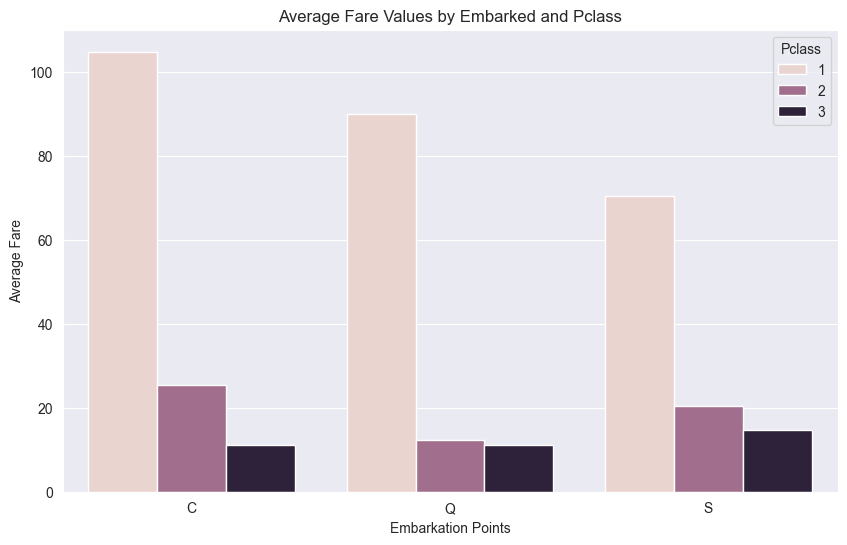

In [27]:
# Drop rows with null values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])

# Group by 'Embarked' and 'Pclass' and calculate average fare values
grouped_data = df.groupby(['Embarked', 'Pclass'])
mean_fare_values = grouped_data['Fare'].mean().reset_index() # the reset_index used to convert the data back into a dataframe

# Visualize the data with a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=mean_fare_values)

# set the axes labels and title of the bar chart
plt.title('Average Fare Values by Embarked and Pclass')
plt.xlabel('Embarkation Points')
plt.ylabel('Average Fare')
plt.show()


# **Comments:**
# As seen in the graph, the average fare values of the Pclass of 1 is quite higher than the Pclass of 2 and 3.
# And apparently, the embarkation points make a difference on the average fares. C port have higher average fares than the rest.

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
